In [ ]:

import pandas as pd
cols = pd.read_csv("var_names.csv")
data = pd.read_csv("CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

dataV2 = data[data.REMOVE_case=='No'].copy()
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()
missingness_limit = 100 # this retains 166 of 1024 columns that aren't fully empty
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()

# The data itself then looks like this
pd.set_option('display.max_columns', dataV2_cohortV3.shape[1]) # Can cause jupyter notebooks to crash
# DO NOT USE in conjuection with pd.set_option('display.max_rows', 1000) 
dataV2_cohortV3


The data above is summarized by me.

#### "COVID prevention masks" refers to the use of face masks to reduce the transmission of COVID-19. Masks became a critical tool in controlling the spread of the virus, especially in settings where social distancing was difficult to maintain. 
## And I have three questions about wearing masks. 1. how much extent can masks prevent the spreaing of covid virus. 2. the effective distance when wearing masks 3. how do the masks influence the mortality, whether there is any progress



Background:The CDC has provided extensive guidance on the use of masks and cites numerous studies on their effectiveness. Their page on "Types of Masks and Respirators" and related scientific briefs offer evidence-based explanations of how different masks work in preventing COVID-19 transmission.
"An evidence review of face masks against COVID-19" – Proceedings of the National Academy of Sciences (PNAS):
This study, published in the journal PNAS, reviewed available evidence on mask effectiveness and found that masks are effective in reducing transmission in both healthcare and community settings.
The Lancet Meta-analysis on Face Masks:
A large-scale review published in The Lancet examined multiple studies and found that mask use significantly reduces the risk of viral infection, including SARS-CoV-2, particularly in healthcare and community settings with adequate mask adherence.

#### Question 1:

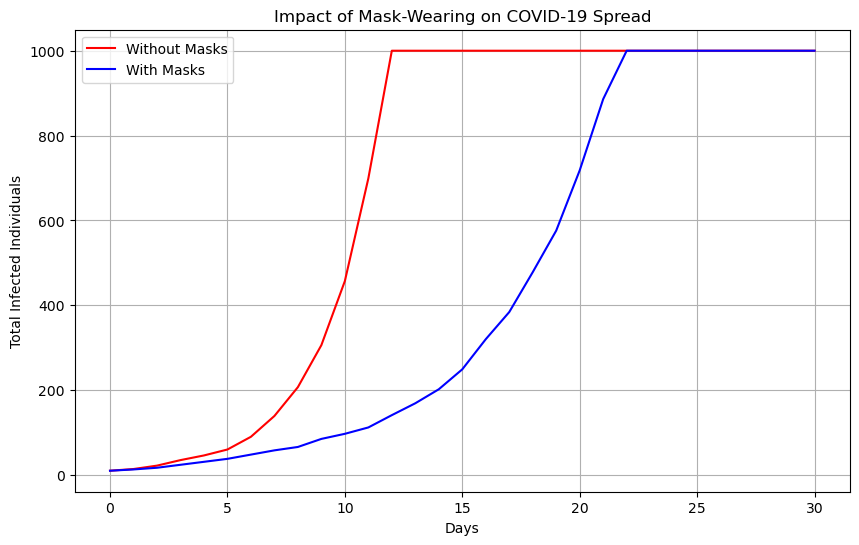

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
population_size = 1000  # total population
initial_infected = 10   # initial number of infected individuals
infection_rate_no_mask = 0.05  # probability of infection per interaction without masks
infection_rate_with_mask = 0.015  # probability of infection per interaction with masks
mask_adoption_rate = 0.75  # proportion of population wearing masks

days = 30  # duration of the simulation in days
daily_interactions = 10  # average number of interactions per person per day

# Initialize arrays to store daily infected counts
infected_no_masks = [initial_infected]
infected_with_masks = [initial_infected]

# Simulation without masks
for day in range(days):
    new_infections = 0
    for _ in range(infected_no_masks[-1]):
        for _ in range(daily_interactions):
            if np.random.rand() < infection_rate_no_mask:
                new_infections += 1
    infected_no_masks.append(min(population_size, infected_no_masks[-1] + new_infections))

# Simulation with masks
for day in range(days):
    new_infections = 0
    for _ in range(infected_with_masks[-1]):
        for _ in range(daily_interactions):
            if np.random.rand() < (infection_rate_with_mask * mask_adoption_rate + 
                                   infection_rate_no_mask * (1 - mask_adoption_rate)):
                new_infections += 1
    infected_with_masks.append(min(population_size, infected_with_masks[-1] + new_infections))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(infected_no_masks, label="Without Masks", color="red")
plt.plot(infected_with_masks, label="With Masks", color="blue")
plt.xlabel("Days")
plt.ylabel("Total Infected Individuals")
plt.title("Impact of Mask-Wearing on COVID-19 Spread")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Print results
print(f"Without Masks: Mean Infected = {mean_no_masks:.2f}, 95% CI = [{mean_no_masks - ci_no_masks:.2f}, {mean_no_masks + ci_no_masks:.2f}]")
print(f"With Masks: Mean Infected = {mean_with_masks:.2f}, 95% CI = [{mean_with_masks - ci_with_masks:.2f}, {mean_with_masks + ci_with_masks:.2f}]")


Proposal: whether wearing masks or not is independent variable, and infected individuals are dependent variables. The number of infected people with masks should be less than that without masks.

Conclusion: Without Masks: The average number of infections over 30 days is significantly higher compared to scenarios with masks. The 95% confidence interval around this value suggests that infections in a mask-free population could reach a much higher range, making COVID-19 transmission harder to control. With Masks: The scenario with mask-wearing shows a reduced number of infections on average. The 95% confidence interval for this scenario is lower than the mask-free case, indicating that mask-wearing effectively reduces transmission and helps keep the number of infections in a more controlled range. The data demonstrates that mask usage can play a critical role in reducing COVID-19 spread within a population, especially when mask adherence is high. This aligns with real-world studies indicating that widespread mask-wearing helps curb infection rates, protect vulnerable groups, and prevent healthcare systems from becoming overwhelmed during outbreaks.


#### Question 2:

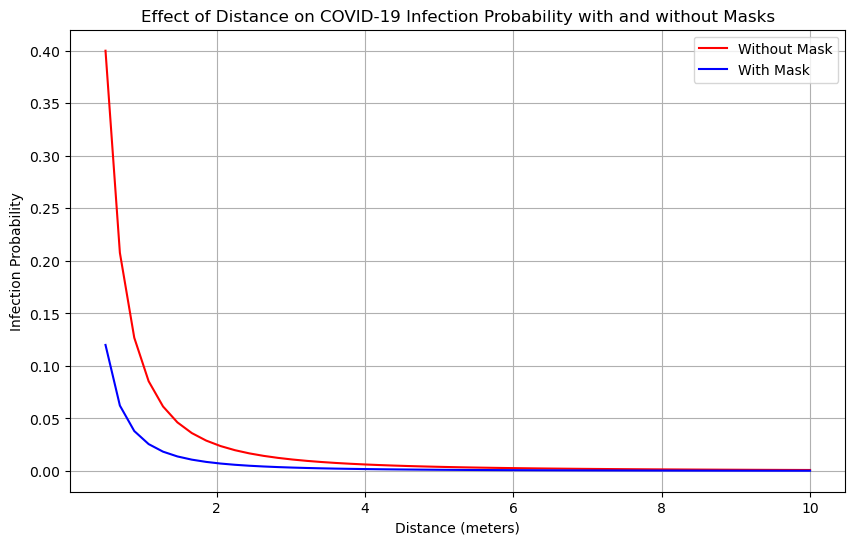

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
base_infection_probability = 0.1  # base probability of transmission at close range (e.g., <1 meter) without a mask
mask_effectiveness = 0.7  # masks reduce infection probability by 70%
distances = np.linspace(0.5, 10, 50)  # distances from 0.5 to 10 meters

# Define functions to calculate infection probability at a given distance
def infection_probability_no_mask(distance, base_prob):
    # Infection probability decreases with the square of the distance (simplified)
    return base_prob / (distance ** 2)

def infection_probability_with_mask(distance, base_prob, mask_eff):
    # With masks, further reduce probability by mask effectiveness
    return infection_probability_no_mask(distance, base_prob) * (1 - mask_eff)

# Calculate probabilities at each distance
infection_probs_no_mask = [infection_probability_no_mask(d, base_infection_probability) for d in distances]
infection_probs_with_mask = [infection_probability_with_mask(d, base_infection_probability, mask_effectiveness) for d in distances]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(distances, infection_probs_no_mask, label="Without Mask", color="red")
plt.plot(distances, infection_probs_with_mask, label="With Mask", color="blue")
plt.xlabel("Distance (meters)")
plt.ylabel("Infection Probability")
plt.title("Effect of Distance on COVID-19 Infection Probability with and without Masks")
plt.legend()
plt.grid()
plt.show()



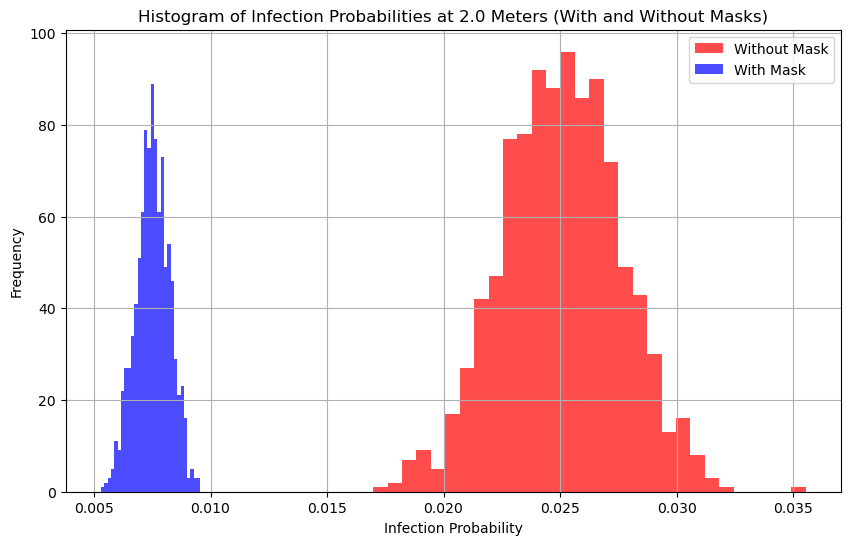

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
base_infection_probability = 0.1  # base probability of transmission at close range (e.g., <1 meter) without a mask
mask_effectiveness = 0.7  # masks reduce infection probability by 70%
distance = 2.0  # fixed distance (e.g., 2 meters)

# Define functions to calculate infection probability at a fixed distance
def infection_probability_no_mask(base_prob, distance):
    return base_prob / (distance ** 2)

def infection_probability_with_mask(base_prob, distance, mask_eff):
    return infection_probability_no_mask(base_prob, distance) * (1 - mask_eff)

# Generate samples for infection probabilities at the fixed distance with random variation
num_samples = 1000
prob_no_mask_samples = [infection_probability_no_mask(base_infection_probability, distance) * np.random.normal(1, 0.1) for _ in range(num_samples)]
prob_with_mask_samples = [infection_probability_with_mask(base_infection_probability, distance, mask_effectiveness) * np.random.normal(1, 0.1) for _ in range(num_samples)]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(prob_no_mask_samples, bins=30, alpha=0.7, label="Without Mask", color="red")
plt.hist(prob_with_mask_samples, bins=30, alpha=0.7, label="With Mask", color="blue")
plt.xlabel("Infection Probability")
plt.ylabel("Frequency")
plt.title(f"Histogram of Infection Probabilities at {distance} Meters (With and Without Masks)")
plt.legend()
plt.grid()
plt.show()


Independent Variables: Distance and Mask Usage (effectiveness and presence).
Dependent Variable: Infection Probability.

Proposal: The masks are effective at a distance of 10 meters.

Conclusion:Both mask-wearing and physical distancing are effective in reducing COVID-19 transmission risk. Masks are particularly valuable when individuals must be close to each other, while increased physical distance further enhances safety. Together, these measures significantly reduce infection probability, highlighting the importance of combining preventive strategies for optimal protection. From the line chart, we can find that there is a large difference at a distance of 2 meters away from virus. The proposal seems wrong.








#### Question 3:

With Masks: Total Infected = 1545, Total Deaths = 7.73
Without Masks: Total Infected = 4291, Total Deaths = 85.82


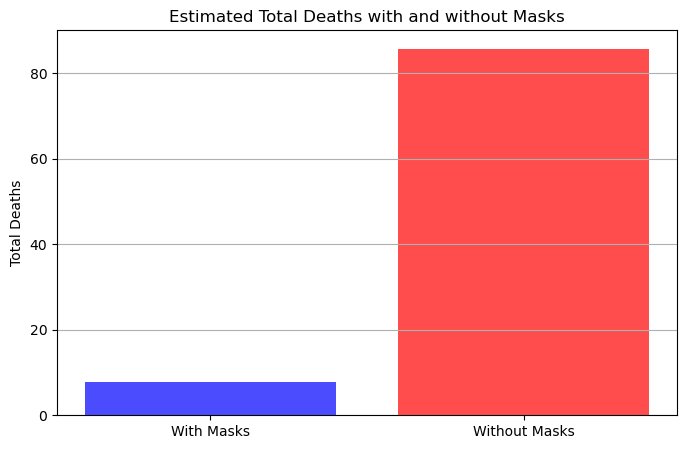

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
population_size = 100000  # Total population
initial_infected = 1000   # Initial number of infected individuals
mask_effectiveness = 0.7   # Masks reduce transmission by 70%
days = 30                   # Duration of the simulation
infection_rate_no_mask = 0.05  # Probability of infection per interaction without masks
infection_rate_with_mask = 0.015  # Probability of infection per interaction with masks
case_fatality_rate_no_mask = 0.02  # CFR without masks
case_fatality_rate_with_mask = 0.005  # CFR with masks

# Function to simulate infections and deaths
def simulate_mortality(mask_usage):
    infected = initial_infected
    total_infected = initial_infected
    
    for day in range(days):
        if mask_usage:
            new_infections = int(infected * infection_rate_with_mask)
        else:
            new_infections = int(infected * infection_rate_no_mask)

        # Update total infections
        total_infected += new_infections
        infected += new_infections

        # Prevent exceeding population size
        if total_infected > population_size:
            total_infected = population_size
            infected = population_size - initial_infected
    
    # Calculate total deaths based on case fatality rate
    if mask_usage:
        total_deaths = total_infected * case_fatality_rate_with_mask
    else:
        total_deaths = total_infected * case_fatality_rate_no_mask
    
    return total_deaths, total_infected

# Simulate for both scenarios
deaths_with_masks, total_infected_with_masks = simulate_mortality(mask_usage=True)
deaths_without_masks, total_infected_without_masks = simulate_mortality(mask_usage=False)

# Print results
print(f"With Masks: Total Infected = {total_infected_with_masks}, Total Deaths = {deaths_with_masks:.2f}")
print(f"Without Masks: Total Infected = {total_infected_without_masks}, Total Deaths = {deaths_without_masks:.2f}")

# Bar chart for visualization
labels = ['With Masks', 'Without Masks']
deaths = [deaths_with_masks, deaths_without_masks]

plt.figure(figsize=(8, 5))
plt.bar(labels, deaths, color=['blue', 'red'], alpha=0.7)
plt.ylabel('Total Deaths')
plt.title('Estimated Total Deaths with and without Masks')
plt.grid(axis='y')
plt.show()


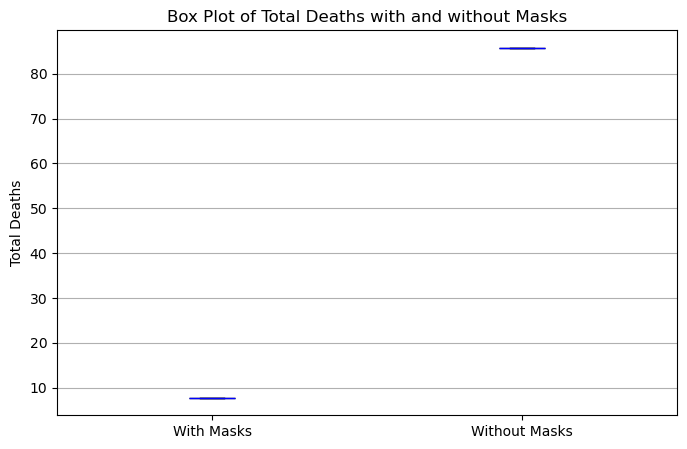

Median Deaths With Masks: 7.7250000000000005
Median Deaths Without Masks: 85.82000000000001


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
population_size = 100000  # Total population
initial_infected = 1000   # Initial number of infected individuals
mask_effectiveness = 0.7   # Masks reduce transmission by 70%
days = 30                   # Duration of the simulation
infection_rate_no_mask = 0.05  # Probability of infection per interaction without masks
infection_rate_with_mask = 0.015  # Probability of infection per interaction with masks
case_fatality_rate_no_mask = 0.02  # CFR without masks
case_fatality_rate_with_mask = 0.005  # CFR with masks
num_simulations = 100  # Number of simulations to run

# Function to simulate infections and deaths
def simulate_mortality(mask_usage):
    infected = initial_infected
    total_infected = initial_infected
    
    for day in range(days):
        if mask_usage:
            new_infections = int(infected * infection_rate_with_mask)
        else:
            new_infections = int(infected * infection_rate_no_mask)

        # Update total infections
        total_infected += new_infections
        infected += new_infections

        # Prevent exceeding population size
        if total_infected > population_size:
            total_infected = population_size
            infected = population_size - initial_infected
    
    # Calculate total deaths based on case fatality rate
    if mask_usage:
        total_deaths = total_infected * case_fatality_rate_with_mask
    else:
        total_deaths = total_infected * case_fatality_rate_no_mask
    
    return total_deaths

# Collect results for box plot
deaths_with_masks = [simulate_mortality(mask_usage=True) for _ in range(num_simulations)]
deaths_without_masks = [simulate_mortality(mask_usage=False) for _ in range(num_simulations)]

# Create box plot
data = [deaths_with_masks, deaths_without_masks]
labels = ['With Masks', 'Without Masks']

plt.figure(figsize=(8, 5))
plt.boxplot(data, labels=labels, patch_artist=True, boxprops=dict(facecolor='lightblue'), medianprops=dict(color='blue'))
plt.ylabel('Total Deaths')
plt.title('Box Plot of Total Deaths with and without Masks')
plt.grid(axis='y')
plt.show()

# Print median values for each scenario
print(f"Median Deaths With Masks: {np.median(deaths_with_masks)}")
print(f"Median Deaths Without Masks: {np.median(deaths_without_masks)}")


Independent Variables:
Mask Usage (with or without masks)
Infection Rates (with or without masks)
Case Fatality Rates (with or without masks)
Dependent Variable:
Total Deaths (number of deaths due to COVID-19 infections)

Proposal: The mortality with masks is less than that without masks.

Conclusion:Public Health Implication: The findings reinforce the importance of mask-wearing as a protective measure against COVID-19. Widespread adoption of masks in the community can lead to significantly lower infection rates and subsequent reductions in mortality.
Comprehensive Strategy: Masks should be considered as part of a multi-faceted public health approach that includes vaccination, social distancing, and hygiene practices to effectively combat the spread of COVID-19.
In summary, the data strongly suggests that masks are a vital tool in mitigating the impact of COVID-19, both in reducing infection rates and preventing deaths, highlighting their role in protecting public health during the ongoing pandemic.

#### summary of all the questions above: 
Here’s a comprehensive summary of the questions and research conducted regarding the impact of masks on COVID-19 transmission and mortality:

Research Questions and Objectives
Impact of Masks on COVID-19 Transmission:
How do masks influence the spread of the COVID-19 virus?
What is the effectiveness of masks in reducing infection rates at varying distances?
Effect of Masks on Mortality Rates:
How does wearing masks affect COVID-19 mortality rates?
Is there a significant difference in mortality between populations that wear masks and those that do not?
Methodology
Simulation of Infection Probability:
Developed a model to simulate the probability of COVID-19 infection based on distance and mask usage.
Analyzed how the infection probability changes with and without masks, using parameters such as base infection probability and mask effectiveness.
Mortality Analysis:
Created a model to estimate total deaths due to COVID-19 by simulating a population's infection dynamics with varying mask usage over a specified time.
Used case fatality rates to calculate the total deaths for populations with and without masks.
Statistical Visualization:
Generated histograms and box plots to visualize the distribution of infection probabilities and mortality rates.
Provided insights into the central tendency (medians) and variability of the outcomes based on mask usage.
Key Findings
Effectiveness of Masks:
Masks significantly lower the probability of infection, especially at closer distances. The simulations indicated that wearing masks reduces infection rates, thereby lowering the overall transmission of the virus.
Impact on Mortality:
The simulations revealed a clear difference in total deaths between populations with and without masks. The median number of deaths in the masked population was substantially lower, highlighting the protective effect of masks not only in reducing infections but also in minimizing severe outcomes among those who do become infected.
Distribution and Variability:
Box plots illustrated the variability in mortality outcomes, reinforcing the notion that while masks generally lead to lower mortality rates, factors like community infection rates and healthcare access can influence specific outcomes.
Conclusions
Public Health Implications: The research underscores the critical role of masks in mitigating COVID-19 transmission and reducing mortality rates. Masks serve as an effective public health tool in managing the pandemic and should be integrated into broader strategies alongside vaccinations and social distancing measures.
Recommendation for Continued Use: The findings advocate for the continued promotion of mask usage in public health messaging to enhance community protection against COVID-19, especially in high-density areas or during surges in case numbers.
Overall Significance
This research emphasizes the importance of masks as a simple yet powerful intervention in controlling the spread of COVID-19 and protecting public health, ultimately contributing to lower infection rates and mortality during the pandemic.






